In [1]:
import share.myAudio as ma
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

#마이너스 기호 표시
plt.rcParams['axes.unicode_minus'] = False

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

ROOT_DIR = 'c:/data/AudioMnist/'

In [2]:
train = pd.read_csv(ROOT_DIR+'train_audioMNIST.csv')
train.head()

file_name  label
0  c:/data/AudioMnist/23/0_23_44.wav      0
1  c:/data/AudioMnist/60/0_60_14.wav      0
2  c:/data/AudioMnist/50/4_50_29.wav      4
3  c:/data/AudioMnist/03/9_03_17.wav      9
4  c:/data/AudioMnist/04/0_04_31.wav      0

In [3]:
train.shape

(22500, 2)

In [4]:
train.groupby(train.label).count()

file_name
label           
0           2252
1           2269
2           2279
3           2262
4           2239
5           2257
6           2218
7           2232
8           2251
9           2241

In [5]:
#X = train.label.groupby(train.label).count().index
X = train.groupby(train.label).count().index
X

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')

In [6]:
#Y = train.label.groupby(train.label).count()
Y = train.groupby(train.label).count()['file_name']
Y

label
0    2252
1    2269
2    2279
3    2262
4    2239
5    2257
6    2218
7    2232
8    2251
9    2241
Name: file_name, dtype: int64

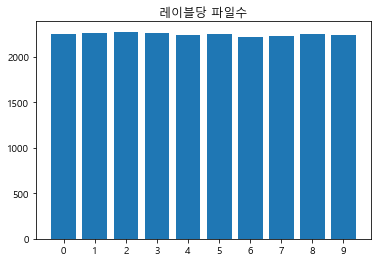

In [7]:
plt.bar(X,Y)
plt.xticks(X)
plt.title("레이블당 파일수")
plt.show()

In [8]:
temp = train[train.label == 4].file_name
temp

2        c:/data/AudioMnist/50/4_50_29.wav
26       c:/data/AudioMnist/30/4_30_36.wav
31        c:/data/AudioMnist/52/4_52_5.wav
33       c:/data/AudioMnist/33/4_33_27.wav
43       c:/data/AudioMnist/06/4_06_14.wav
                       ...                
22471    c:/data/AudioMnist/15/4_15_13.wav
22477     c:/data/AudioMnist/14/4_14_2.wav
22483    c:/data/AudioMnist/03/4_03_19.wav
22486     c:/data/AudioMnist/11/4_11_8.wav
22491    c:/data/AudioMnist/17/4_17_44.wav
Name: file_name, Length: 2239, dtype: object

In [9]:
temp.index

Int64Index([    2,    26,    31,    33,    43,    59,    64,    67,    79,
              100,
            ...
            22428, 22429, 22440, 22446, 22470, 22471, 22477, 22483, 22486,
            22491],
           dtype='int64', length=2239)

In [10]:
temp[2]

'c:/data/AudioMnist/50/4_50_29.wav'

In [11]:
#0~9 데이터 사운드
def get_audio(num = 0):
    # Audio Sample 폴더
    temp = train[train.label == num].file_name
    file = temp[temp.index[0]]

    #음성파일 로드
    data, sample_rate = librosa.load(file)

    #오디오 파형 그래프
    dsp.waveshow(data, sr=sample_rate)
    plt.show()

    #사운드 플레이
    #return Audio(data=data, rate=sample_rate)
    return ma.Audio(data, sample_rate)

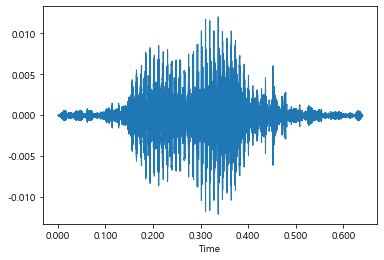

In [12]:
get_audio(0)    #0의 음성

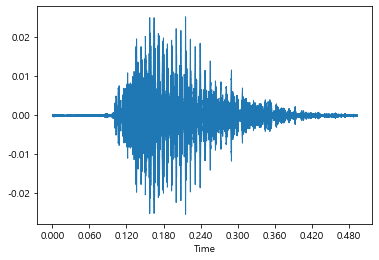

In [13]:
get_audio(1)    #1의 음성

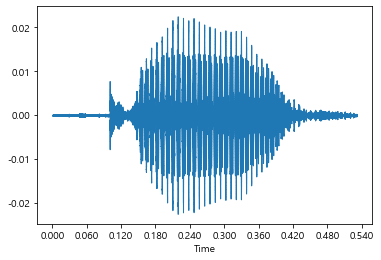

In [14]:
get_audio(2)    #2의 음성

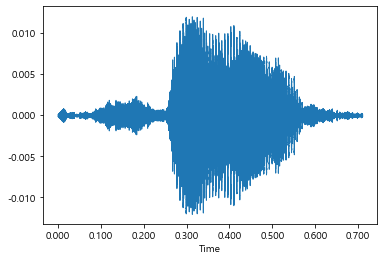

In [15]:
get_audio(3)    #3의 음성

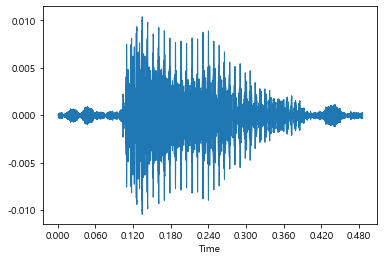

In [16]:
get_audio(4)    #4의 음성

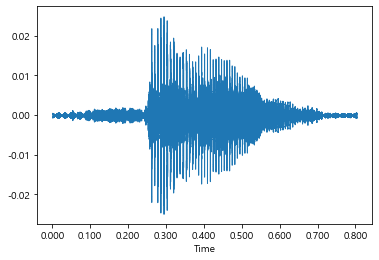

In [17]:
get_audio(5)    #5의 음성

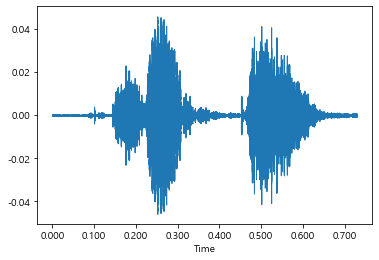

In [18]:
get_audio(6)    #6의 음성

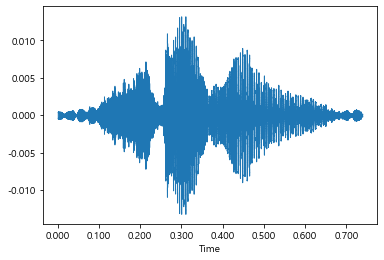

In [19]:
get_audio(7)    #7의 음성

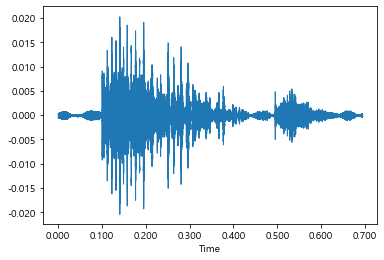

In [20]:
get_audio(8)    #8의 음성

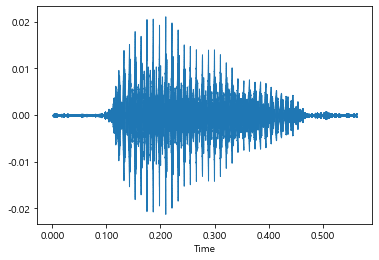

In [21]:
get_audio(9)    #9의 음성

In [22]:
#주파수(frequency)성분을 뽑아내기 위해 퓨리에 변환(Fourier Transform) 사용
#FFT(Fast Fourier Transform) 퓨리에 변환: 입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것 > Spectrum

def fourier_transform(num=0):
    # Audio Sample 폴더
    temp = train[train.label == num].file_name
    file = temp[temp.index[0]]

    data, sample_rate = librosa.load(file)
    fft = np.fft.fft(data)

    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    #plt.plot(frequency, magnitude)             #전체 파형 (좌우가 비례)
    plt.plot(left_frequency, left_magnitude)    #왼쪽 파형만 출력한다.
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title(f'Fourier transform of audio label {num}')
    plt.show()

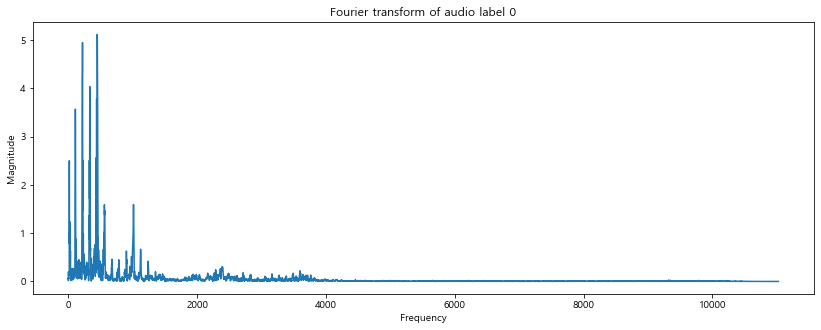

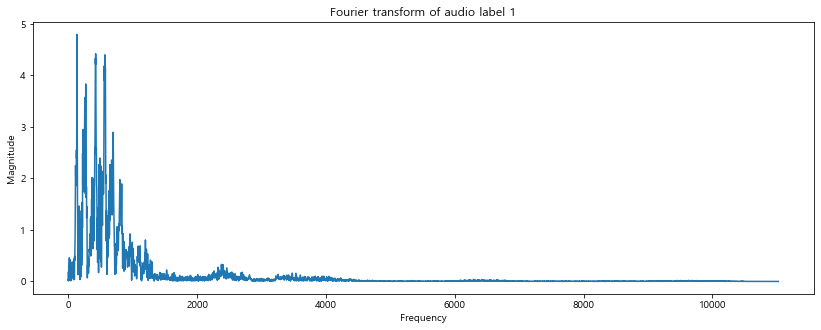

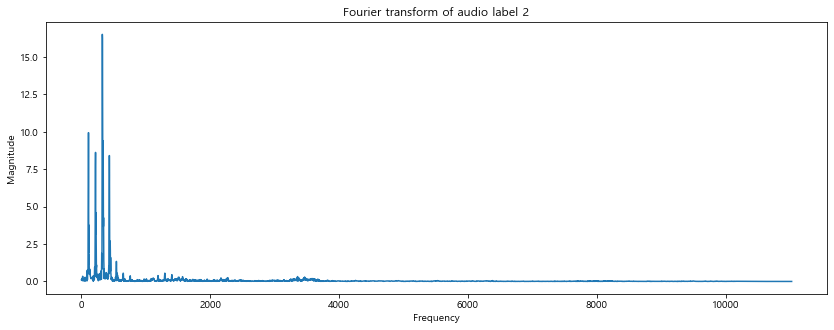

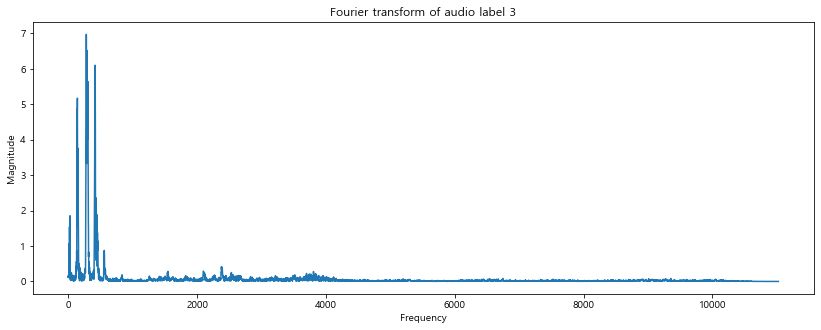

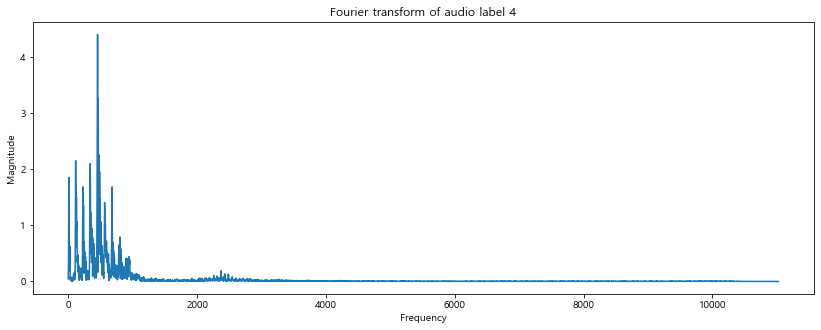

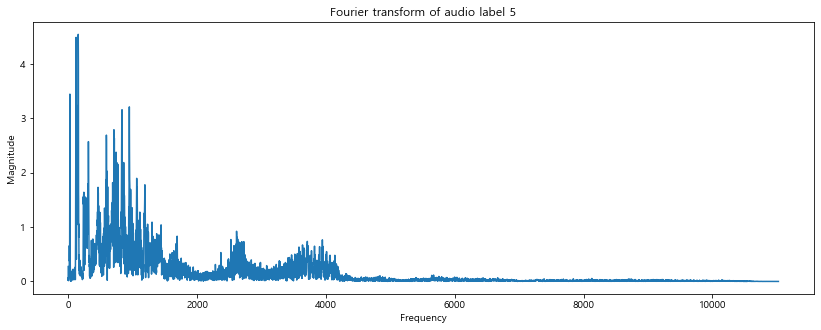

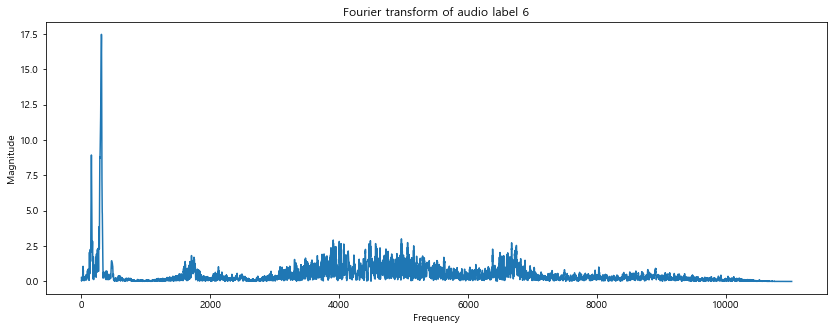

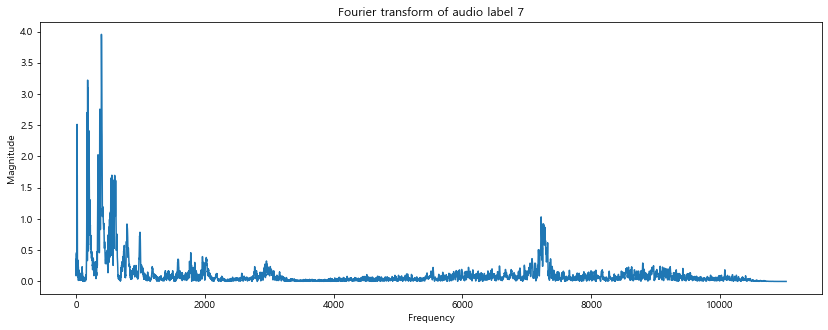

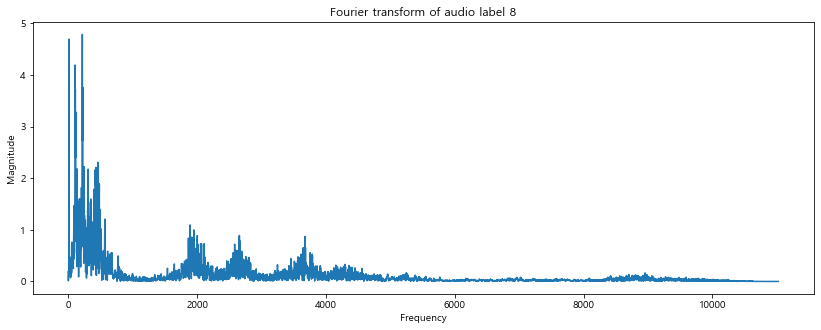

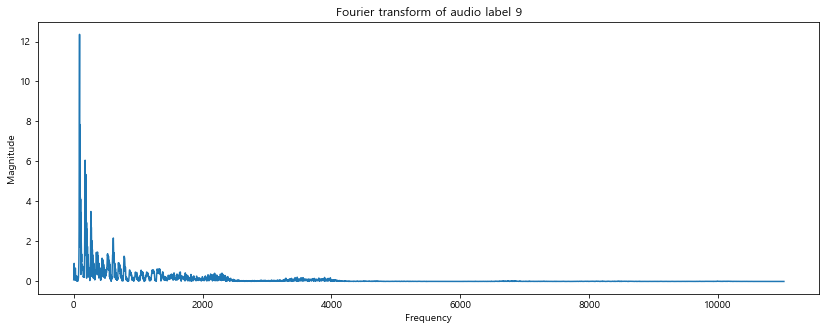

In [23]:
for i in range(0,10):
    fourier_transform(i)

In [24]:
#Spectogram은 소리나 파동을 시각화하여 파악하기 위한 도구로 
# 파형(waveform)과 스펙트럼(spectrum)의 특징이 조합되어 있는 그래프
#Mel Spetrogram은 주파수를 mel-scale로 변환한 형태 
#Mel은 사람의 달팽이관을 모티브로 따온 값
#  주파수가 높은 대역에서는 주파수 감지를 잘 하지 못함.
#  Mel-Scale: 이러한 원리를 이용한 filter, scaling의 기준이 됨.

#n_fft : 한 번 fft를 해 줄 만큼의 sequence 길이, window size라고도 부르는데, frame의 length를 결정하는 파라미터
#16000Hz인 음성에서는 25m의 음성크기를 기본으로 하며 n_fft는 16000 * 0.025 = 400 (sampling rate*frame_length=n_fft)가 됨.
#hop_length : window 간의 거리 (sampling rate * frame_stride)

def Mel_s(num = 0, frame_length = 0.025, frame_stride = 0.010):
    # Audio Sample 폴더
    temp = train[train.label == num].file_name
    file = temp[temp.index[0]]

    data, sample_rate = librosa.load(file, sr=16000)
    
    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))
    
    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
    
    print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))
    
    S_dB  = librosa.power_to_db(S, ref=np.max)
    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(S_dB, 
                             sr=sample_rate, 
                             hop_length=input_stride,
                             x_axis='time',
                             y_axis='log')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel spectrogram of audio label {num}")
    plt.show()

Wav length: 0.63925, Mel_S shape:(100, 64)


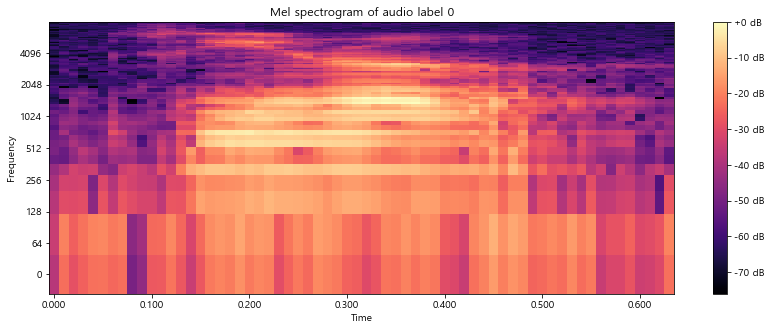

Wav length: 0.492625, Mel_S shape:(100, 50)


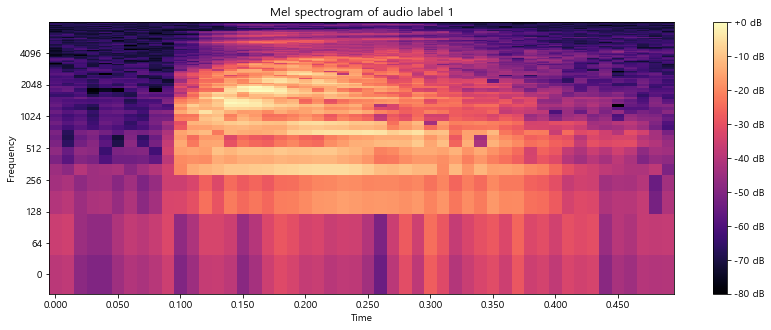

Wav length: 0.5309375, Mel_S shape:(100, 54)


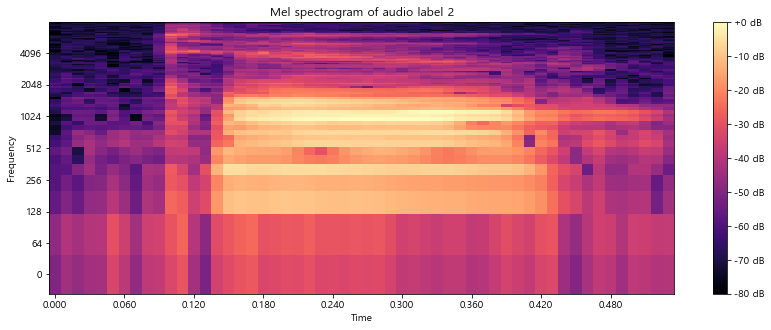

Wav length: 0.7091875, Mel_S shape:(100, 71)


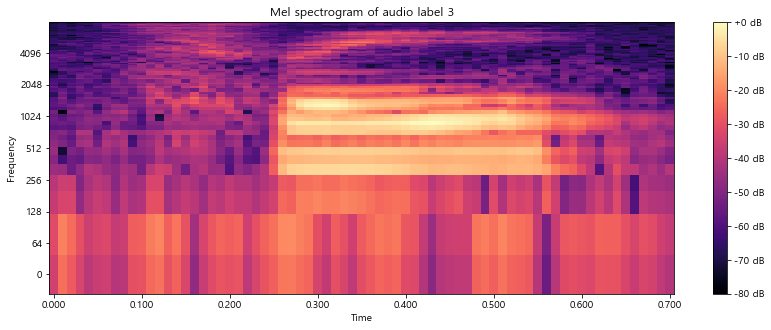

Wav length: 0.485125, Mel_S shape:(100, 49)


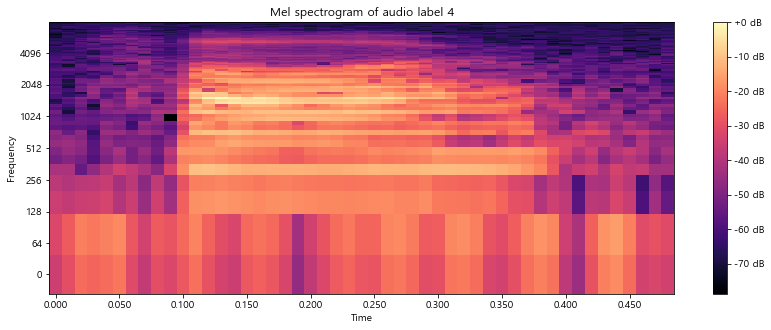

Wav length: 0.80325, Mel_S shape:(100, 81)


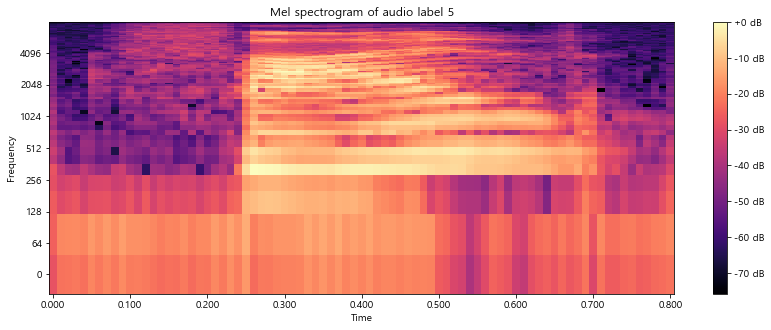

Wav length: 0.7289375, Mel_S shape:(100, 73)


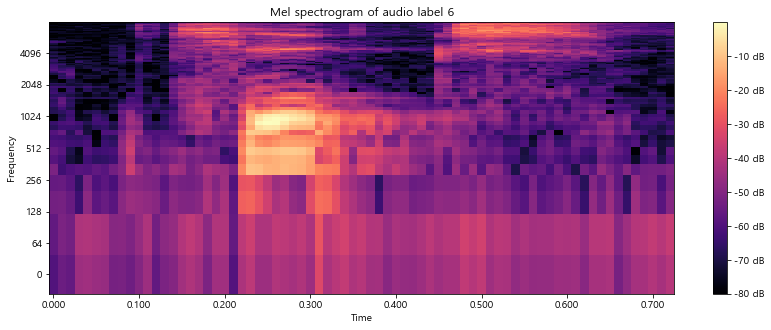

Wav length: 0.7385625, Mel_S shape:(100, 74)


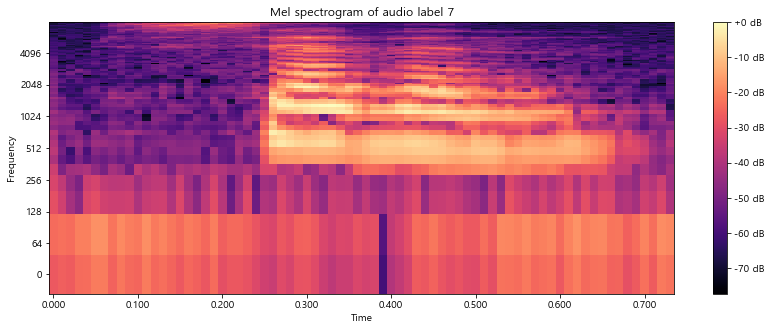

Wav length: 0.6933125, Mel_S shape:(100, 70)


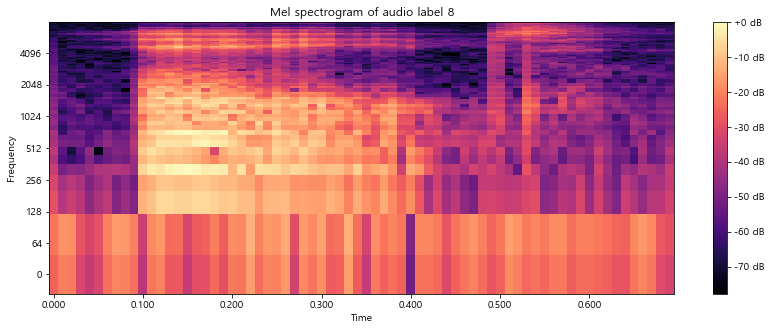

Wav length: 0.56275, Mel_S shape:(100, 57)


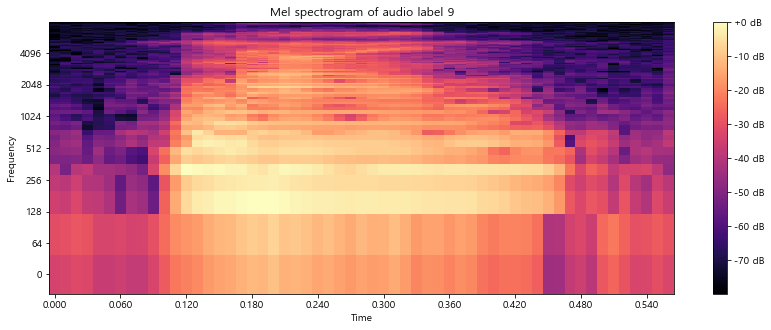

In [25]:
for i in range(0,10):
    Mel_s(i)